# Customer Intent Ontology Analysis

This notebook analyzes the results from the intent classification process, showing the distribution of customer intents and conversation volumes.

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

## Load Intent Ontology Data

In [ ]:
# Load the intent ontology JSON file
with open('../intent_ontology.json', 'r') as f:
    ontology_data = json.load(f)

print(f"Loaded ontology with {len(ontology_data['categories'])} categories")
print(f"Total conversations analyzed: {sum(len(cat['examples']) for cat in ontology_data['categories'])}")

## Extract Intent Data

In [4]:
# Extract intent names, descriptions, and conversation counts
intent_data = []
for category in ontology_data['categories']:
    intent_data.append({
        'intent_name': category['name'],
        'description': category['description'],
        'conversation_count': len(category['examples'])
    })

# Create DataFrame
df = pd.DataFrame(intent_data)
df = df.sort_values('conversation_count', ascending=False)

print("Intent Categories Overview:")
print(df.to_string(index=False))

Intent Categories Overview:
                   intent_name                                                                                                  description  conversation_count
         account_access_issues                                       Customer cannot access their account due to verification requirements.                  74
      return_process_inquiries          Customer is inquiring about the return process and options for faster delivery of a return request.                  68
      product_quality_concerns                    Customer is inquiring about the reason for returning a defective product due to a recall.                  63
             delivery_problems                  Customer is experiencing issues with the delivery of their order and is unable to track it.                  54
         billing_discrepancies                               Customer questions charges or payments due to being overcharged for a product.                  53
      order_

## Intent Distribution Chart

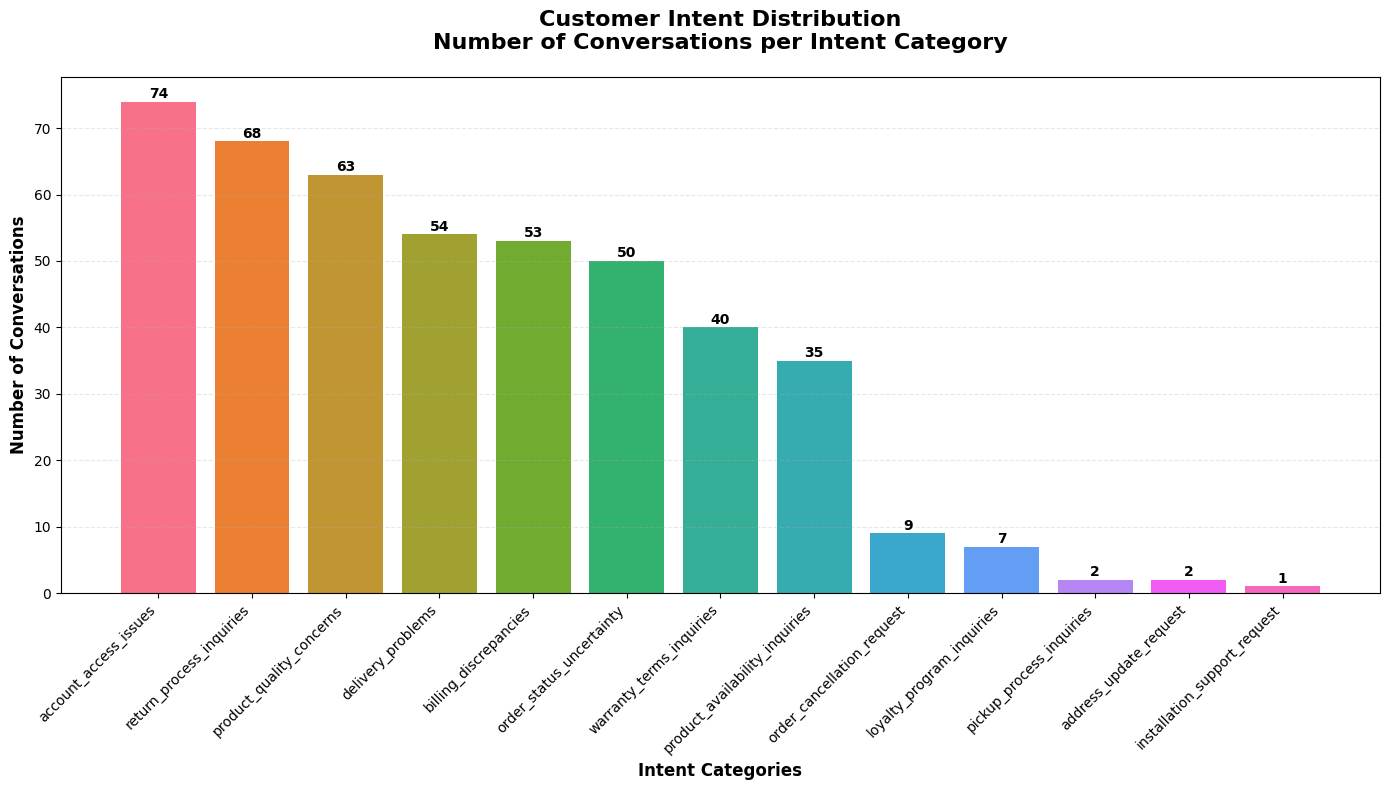

In [5]:
# Create bar chart showing intent distribution
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(df)), df['conversation_count'], 
               color=sns.color_palette("husl", len(df)))

# Customize the plot
plt.title('Customer Intent Distribution\nNumber of Conversations per Intent Category', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Intent Categories', fontsize=12, fontweight='bold')
plt.ylabel('Number of Conversations', fontsize=12, fontweight='bold')

# Set x-axis labels with rotation for better readability
plt.xticks(range(len(df)), df['intent_name'], rotation=45, ha='right')

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

## Routing Volume Analysis

Routing Volume Distribution:
routing_category
HIGH_VOLUME      8
LOW_VOLUME       3
MEDIUM_VOLUME    2
Name: count, dtype: int64


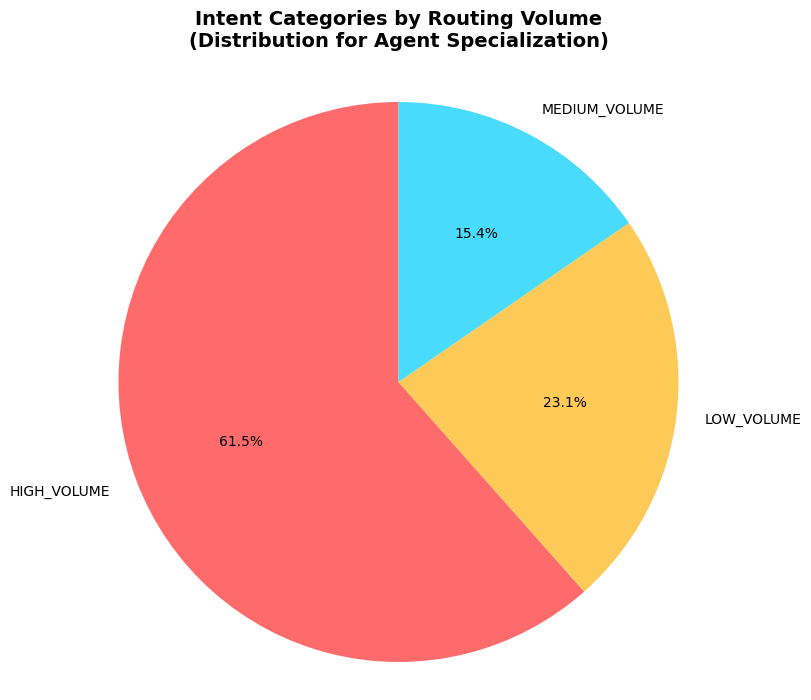

In [6]:
# Categorize intents by volume for routing insights
def categorize_volume(count):
    if count >= 10:
        return 'HIGH_VOLUME'
    elif count >= 5:
        return 'MEDIUM_VOLUME'
    else:
        return 'LOW_VOLUME'

df['routing_category'] = df['conversation_count'].apply(categorize_volume)

# Create routing distribution summary
routing_summary = df['routing_category'].value_counts()
print("Routing Volume Distribution:")
print(routing_summary)

# Create pie chart for routing categories
plt.figure(figsize=(10, 8))
colors = ['#ff6b6b', '#feca57', '#48dbfb']
plt.pie(routing_summary.values, labels=routing_summary.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Intent Categories by Routing Volume\n(Distribution for Agent Specialization)', 
          fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.show()

## Detailed Breakdown by Volume Category

In [7]:
# Show detailed breakdown for each volume category
for category in ['HIGH_VOLUME', 'MEDIUM_VOLUME', 'LOW_VOLUME']:
    subset = df[df['routing_category'] == category]
    if not subset.empty:
        print(f"\n{category} INTENTS ({len(subset)} categories):")
        print("-" * 50)
        for _, row in subset.iterrows():
            print(f"• {row['intent_name']}: {row['conversation_count']} conversations")
            print(f"  Description: {row['description']}")
            print()


HIGH_VOLUME INTENTS (8 categories):
--------------------------------------------------
• account_access_issues: 74 conversations
  Description: Customer cannot access their account due to verification requirements.

• return_process_inquiries: 68 conversations
  Description: Customer is inquiring about the return process and options for faster delivery of a return request.

• product_quality_concerns: 63 conversations
  Description: Customer is inquiring about the reason for returning a defective product due to a recall.

• delivery_problems: 54 conversations
  Description: Customer is experiencing issues with the delivery of their order and is unable to track it.

• billing_discrepancies: 53 conversations
  Description: Customer questions charges or payments due to being overcharged for a product.

• order_status_uncertainty: 50 conversations
  Description: Customer needs information about the status of their package delivery.

• warranty_terms_inquiries: 40 conversations
  Descripti

## Summary Statistics

In [8]:
# Calculate summary statistics
total_conversations = df['conversation_count'].sum()
avg_conversations_per_intent = df['conversation_count'].mean()
most_common_intent = df.iloc[0]

print("SUMMARY STATISTICS")
print("=" * 40)
print(f"Total Intent Categories: {len(df)}")
print(f"Total Conversations Analyzed: {total_conversations}")
print(f"Average Conversations per Intent: {avg_conversations_per_intent:.1f}")
print(f"Most Common Intent: {most_common_intent['intent_name']} ({most_common_intent['conversation_count']} conversations)")
print(f"\nRouting Recommendations:")
print(f"• High-volume intents should have dedicated specialist agents")
print(f"• Medium-volume intents can be handled by trained generalists")
print(f"• Low-volume intents may require escalation protocols")

SUMMARY STATISTICS
Total Intent Categories: 13
Total Conversations Analyzed: 458
Average Conversations per Intent: 35.2
Most Common Intent: account_access_issues (74 conversations)

Routing Recommendations:
• High-volume intents should have dedicated specialist agents
• Medium-volume intents can be handled by trained generalists
• Low-volume intents may require escalation protocols
